### Problem Statement: Has Olympics Achieved gender Equality in competetors in USA? 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

## The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

#### ID - Unique number for each athlete;
#### Name - Athlete's name;
#### Sex - M or F;
#### Age - Integer;
#### Height - In centimeters;
#### Weight - In kilograms;
#### Team - Team name;
#### NOC - National Olympic Committee 3-letter code;
#### Games - Year and season;
#### Year - Integer;
#### Season - Summer or Winter;
#### City - Host city;
#### Sport - Sport;
#### Event - Event;
#### Medal - Gold, Silver, Bronze, or NA.


In [2]:
bf = pd.read_csv("/Users/akcterp/Desktop/Praxis/Term1 /ML/athlete_events.csv")
regions = pd.read_csv("/Users/akcterp/Desktop/Praxis/Term1 /ML/noc_regions (1).csv")
# Reading the files

In [3]:
bf.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
bf.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
np.shape(bf)

(271116, 15)

In [7]:
bf.describe(include='all') # descriptive statistics for all the 15 columns 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
bf.isnull().sum() # finding the sum of null entries

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

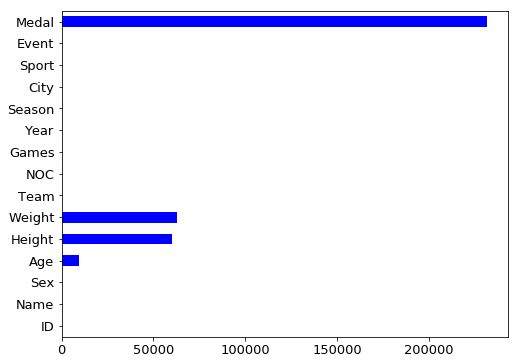

In [10]:
miss = bf.isnull().sum()
miss.plot(kind='barh', figsize = (8,6), color = 'blue', fontsize = 13)
plt.show()

In [11]:
df = pd.merge(bf,regions, on='NOC', how = 'left')

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Finding out participation of Men and Women at the Olympic games

In [54]:
print("Total athletes are ", len(df.ID))
print("Total female athletes are ", len(df[df.Sex == 'F']))
print("Total male athletes are ", len(df[df.Sex == 'M']))

Total athletes are  271116
Total female athletes are  74522
Total male athletes are  196594


In [14]:
74522/196594
#females athletes are only 38% of the number of male athletes

0.37906548521318045

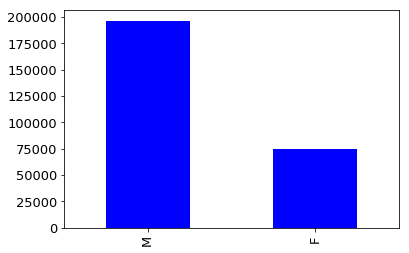

In [15]:
df['Sex'].value_counts().plot(kind = 'bar', figsize = (6,4), color = "blue", fontsize = 13)
plt.show()

In [27]:
tot_medals= df.Team.value_counts().reset_index(name='Medal').head(5)



Text(0.5, 1.0, 'Medals per Country')

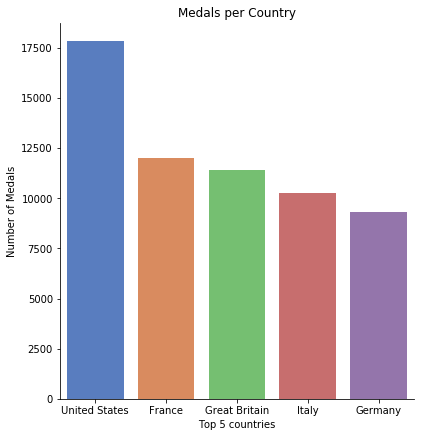

In [28]:
g = sns.catplot(x="index", y="Medal", data=tot_medals,
                height=6, kind="bar", palette="muted")
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [ ]:
# since USA has the maximum medals, we will further analyse the gender equality records of this Country.

## Extract Data of American Athletes

In [30]:
dataUSA = df[df.NOC == 'USA']
dataUSA.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [52]:
dataUSA.Sex.value_counts()

M    3832
F    1805
Name: Sex, dtype: int64

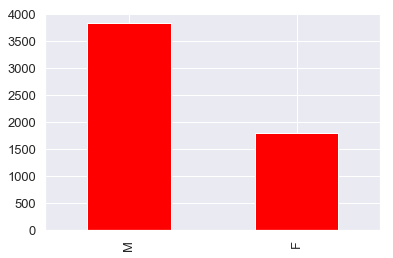

In [51]:
dataUSA['Sex'].value_counts().plot(kind = 'bar', figsize = (6,4), color = "red", fontsize = 13)
plt.show()

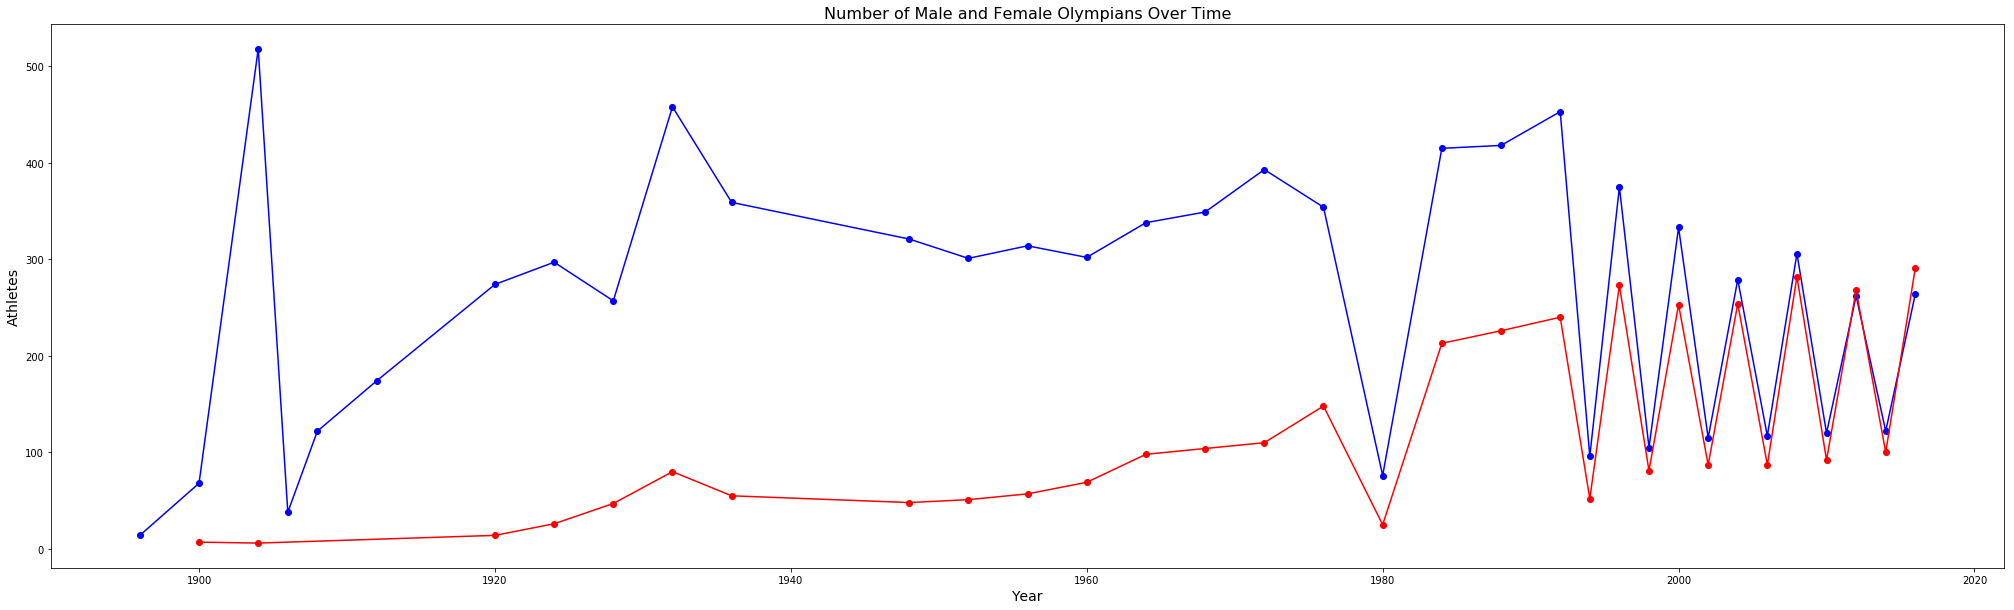

In [31]:
# no. of men & women over time
df0 = dataUSA[(dataUSA.Sex=='M')].groupby(["Year"])['ID'].nunique()
df0 = df0.reset_index()
df1 = dataUSA[(dataUSA.Sex=='F')].groupby(["Year"])['ID'].nunique()
df1 = df1.reset_index()
fig, ax = plt.subplots(figsize=(35,10))
ax.plot(df0.Year, df0.ID,marker ='o',color='blue',label='M')
ax.plot(df1.Year, df1.ID, marker ='o',color='red',label='F')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Athletes',fontsize=14)
ax.set_title('Number of Male and Female Olympians Over Time',fontsize=16)
plt.show()

In [32]:
# Until 1990 no. of males were more than no. of females, after that the ratio came really close

In [55]:
dataUSA.isnull().any() # NULL values in age, height, weight, medal and notes

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region    False
notes      True
dtype: bool

In [56]:
# filtering NULL values since we dont require them in MEDAL column
dataUSA = dataUSA[dataUSA.Medal.notnull()]

In [57]:
# from here on we are only looking at observations with medals since we have dropped the other observations 

In [58]:
dataUSA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA,NaN
278,145,Jeremy Abbott,M,28.0,175.0,70.0,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,USA,NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,NaN
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,NaN


## Medals won according to year 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

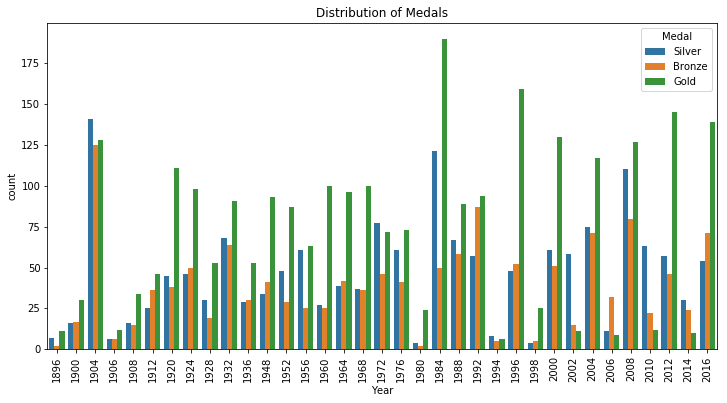

In [37]:
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(x='Year', hue='Medal', data= dataUSA)
plt.title('Distribution of Medals')
plt.xticks(rotation=90)

In [38]:
# USA has constantly won medals and no. of gold medals is usually the most since 1920
# Lets find out in which sport has USA achieved the most gold medals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

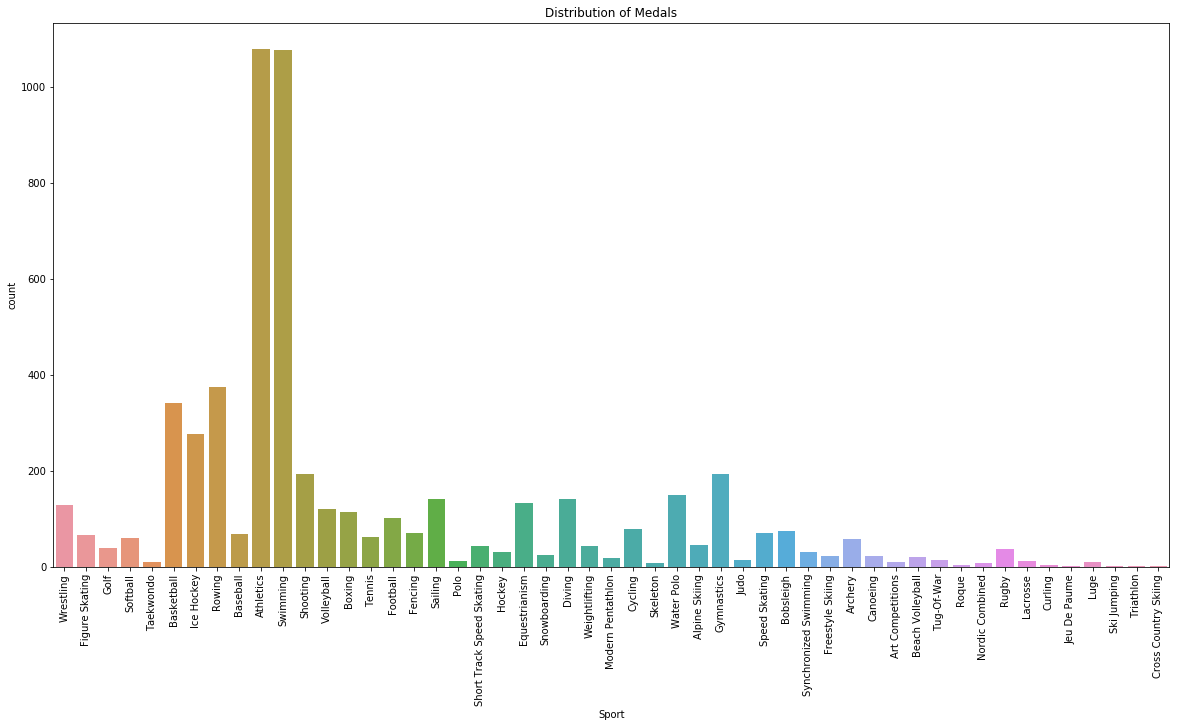

In [39]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x='Sport', data= dataUSA)
plt.title('Distribution of Medals')
plt.xticks(rotation=90)

In [40]:
# As we can clearly see, most gold medals have been won in Athletics and Swimming followed by Rowing, Basketball
# and Ice Hockey.
# Now lets look at distribution of Medals by sport

In [41]:
dataUSA.Sport.value_counts().reset_index(name='Medal').head(3)

,index,Medal
0,Athletics,1080
1,Swimming,1078
2,Rowing,375


Text(0.5, 1.0, 'Women participation in Athletics over the Years for USA')

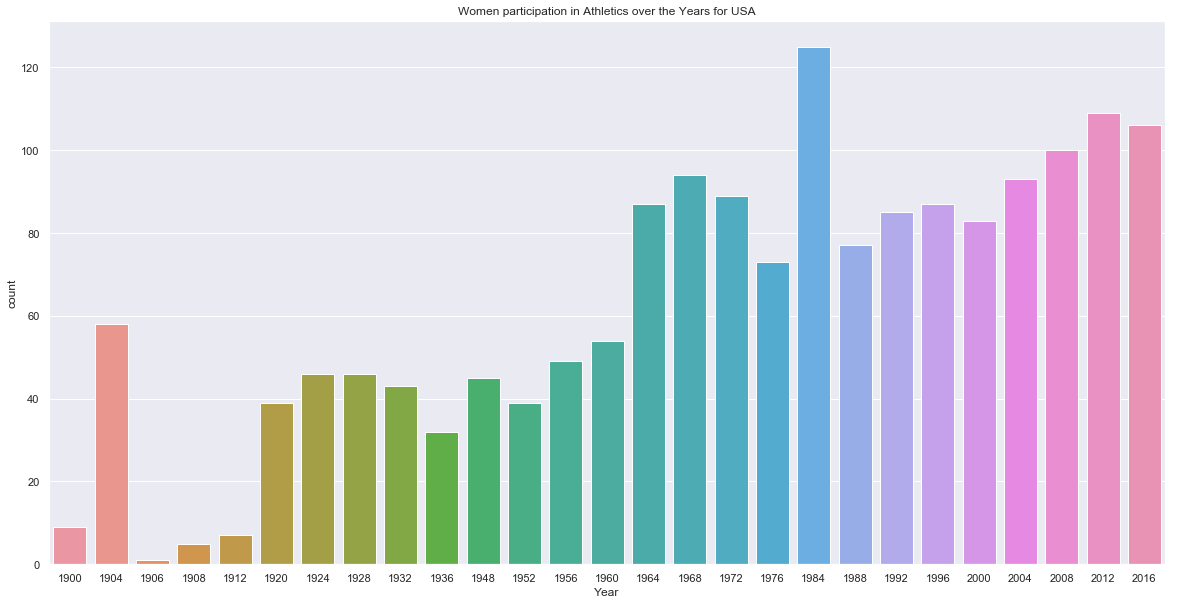

In [42]:
WomenInTop3 = dataUSA[(dataUSA.Sex == 'F') & (dataUSA.Sport == 'Athletics') |(dataUSA.Sport == 'Swimming') | (dataUSA.Sport == 'Rowing')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=WomenInTop3)
plt.title('Women participation in Athletics over the Years for USA')

In [43]:
dataUSA.Sport.value_counts().reset_index(name='Medal').tail(20)

,index,Medal
31,Snowboarding,24
32,Canoeing,21
33,Freestyle Skiing,21
34,Beach Volleyball,20
35,Modern Pentathlon,17
36,Judo,14
37,Tug-Of-War,14
38,Lacrosse,12
39,Polo,12
40,Taekwondo,9


Text(0.5, 1.0, 'Women participation in bottom 3 sports over the Years for USA')

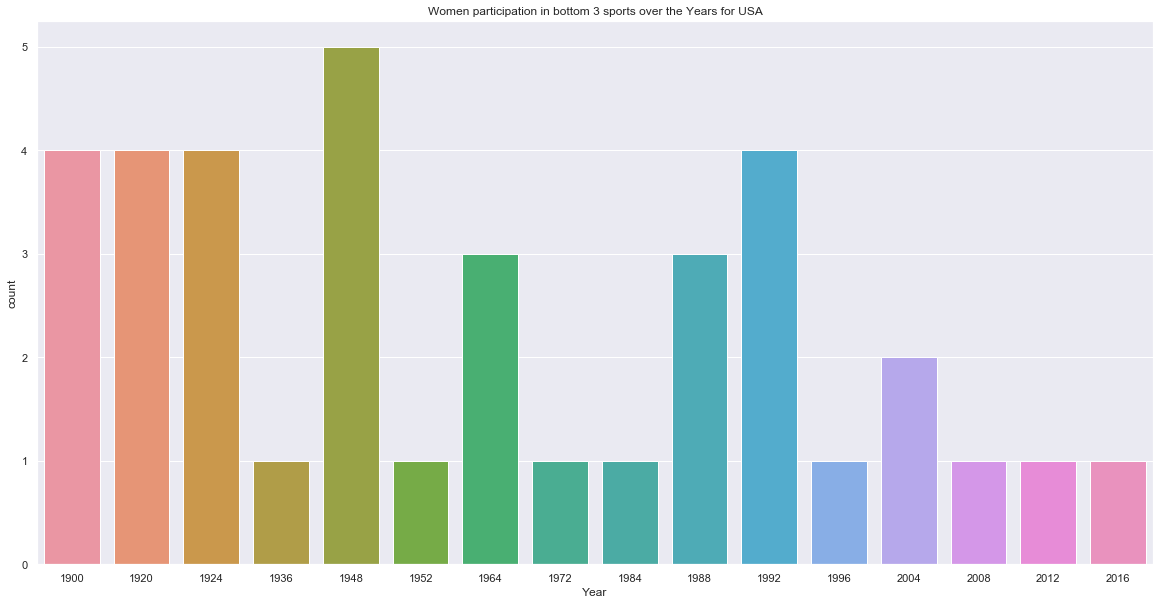

In [44]:
WomenInLow3 = dataUSA[(dataUSA.Sex == 'F') & (dataUSA.Sport == 'Taekwondo') |(dataUSA.Sport == 'Polo') | (dataUSA.Sport == 'Canoeing')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=WomenInLow3)
plt.title('Women participation in bottom 3 sports over the Years for USA')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

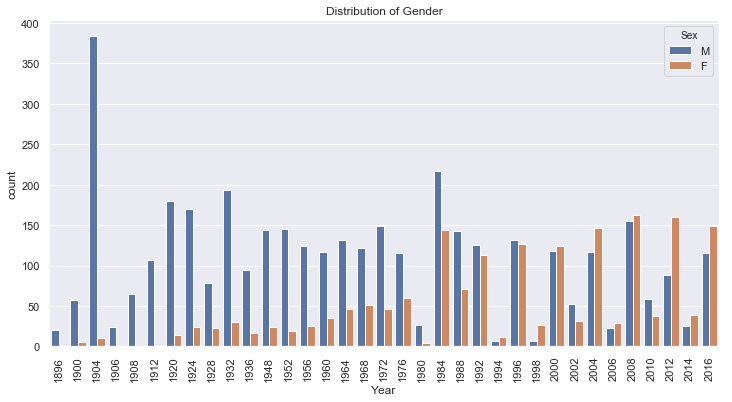

In [59]:
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(x='Year', hue='Sex', data= dataUSA)
plt.title('Distribution of Gender')
plt.xticks(rotation=90)

In [60]:
# we can see female participation has increased over the years 

In [61]:
dataUSA.Season.value_counts()

Summer    5002
Winter     635
Name: Season, dtype: int64

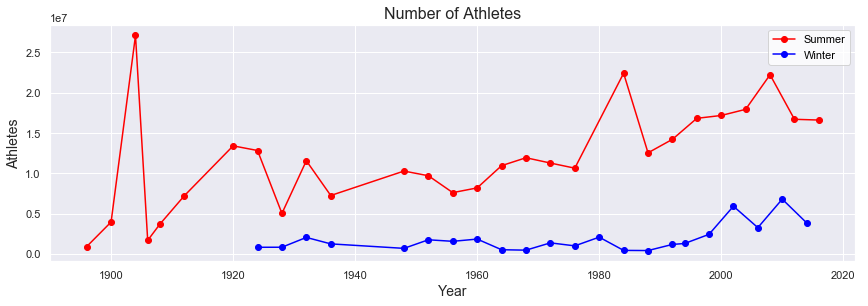

In [62]:
df1 = dataUSA[dataUSA.Season=='Summer'].groupby(['Year']).sum()
df2 = dataUSA[dataUSA.Season=='Winter'].groupby(['Year']).sum()

fig,ax = plt.subplots()
plt.style.use('grayscale')
fig.set_figheight(4)
fig.set_figwidth(12)
fig.tight_layout()
ax.plot(df1.ID, marker = 'o', color = 'red', linestyle = '-')
ax.plot(df2.ID, marker = 'o', color = 'blue', linestyle = '-')
ax.set_title('Number of Athletes',fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Athletes',fontsize=14)
ax.legend(['Summer','Winter'])
plt.show()



In [63]:
summerUSA = dataUSA[(dataUSA.Season == 'Summer') & (dataUSA.Sex == 'F')]
summerUSA.describe() 
# ratio of count of female participation in summer to total summer games is 1564/5002 = 0.313

,ID,Age,Height,Weight,Year
count,1564.000000,1563.000000,1453.000000,1425.000000,1564.000000
mean,68660.354859,23.775432,172.325533,64.325614,1989.475703
std,39539.924942,6.106197,10.072705,11.143249,25.036302
min,150.000000,12.000000,139.000000,34.000000,1900.000000
25%,33774.250000,19.000000,167.000000,57.000000,1984.000000
50%,70711.000000,23.000000,172.000000,63.000000,1996.000000
75%,103722.000000,27.000000,178.000000,70.000000,2008.000000
max,135184.000000,63.000000,203.000000,141.000000,2016.000000


In [64]:
WinterUSA = dataUSA[(dataUSA.Season == 'Winter') & (dataUSA.Sex == 'F')]
WinterUSA.describe()
# ratio of count of female participation in winter to total winter games is 241/635 = 0.379

,ID,Age,Height,Weight,Year
count,241.000000,241.000000,227.000000,226.000000,241.000000
mean,65746.099585,23.381743,167.224670,63.805310,1996.547718
std,39953.123579,3.895981,6.773694,9.351276,18.560678
min,2386.000000,15.000000,147.000000,36.000000,1924.000000
25%,30018.000000,20.000000,163.000000,59.000000,1992.000000
50%,61501.000000,23.000000,167.000000,64.000000,2002.000000
75%,101917.000000,26.000000,173.000000,70.000000,2010.000000
max,134928.000000,33.000000,183.000000,86.000000,2014.000000


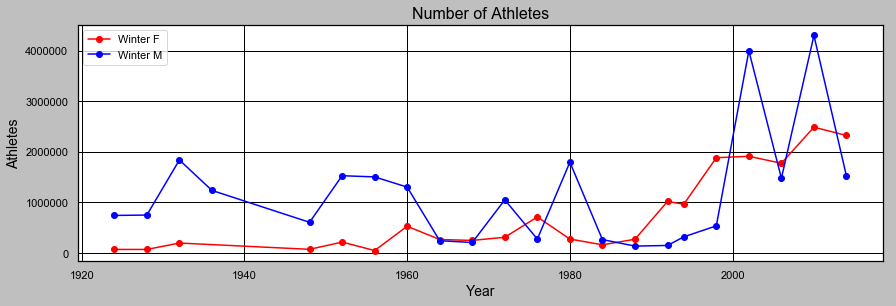

In [65]:
df1 = dataUSA[(dataUSA.Season == 'Winter') & (dataUSA.Sex == 'F')].groupby(['Year']).sum()
df2 = dataUSA[(dataUSA.Season == 'Winter') & (dataUSA.Sex == 'M')].groupby(['Year']).sum()

fig,ax = plt.subplots()
plt.style.use('grayscale')
fig.set_figheight(4)
fig.set_figwidth(12)
fig.tight_layout()
ax.plot(df1.ID, marker = 'o', color = 'red', linestyle = '-')
ax.plot(df2.ID, marker = 'o', color = 'blue', linestyle = '-')
ax.set_title('Number of Athletes',fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Athletes',fontsize=14)
ax.legend(['Winter F','Winter M'])
plt.show()



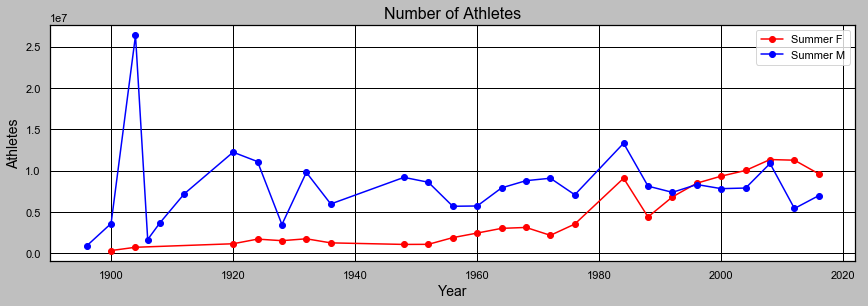

In [66]:
df1 = dataUSA[(dataUSA.Season == 'Summer') & (dataUSA.Sex == 'F')].groupby(['Year']).sum()
df2 = dataUSA[(dataUSA.Season == 'Summer') & (dataUSA.Sex == 'M')].groupby(['Year']).sum()

fig,ax = plt.subplots()
plt.style.use('grayscale')
fig.set_figheight(4)
fig.set_figwidth(12)
fig.tight_layout()
ax.plot(df1.ID, marker = 'o', color = 'red', linestyle = '-')
ax.plot(df2.ID, marker = 'o', color = 'blue', linestyle = '-')
ax.set_title('Number of Athletes',fontsize=16)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Athletes',fontsize=14)
ax.legend(['Summer F','Summer M'])
plt.show()



In [67]:
summerUSA.Sport.value_counts().reset_index(name='Medal').head(20) # summerUSA has females who won medals in the Olypics 
# from USA and now we have medals for them in all sports

,index,Medal
0,Swimming,471
1,Athletics,228
2,Basketball,119
3,Gymnastics,94
4,Rowing,82
5,Football,79
6,Water Polo,63
7,Diving,63
8,Volleyball,60
9,Softball,60


Text(0.5, 1.0, 'Women participation in Swimming over the Years for USA')

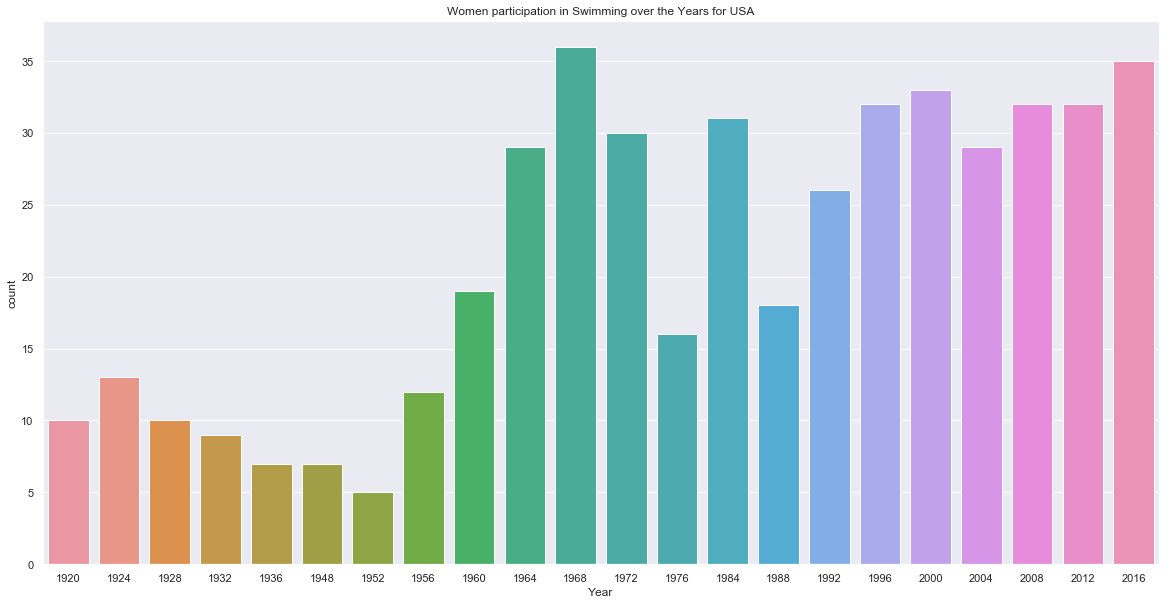

In [68]:
swimming_females = summerUSA[(summerUSA.Sport == 'Swimming')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=swimming_females)
plt.title('Women participation in Swimming over the Years for USA')

Text(0.5, 1.0, 'Women participation in Basketball over the Years for USA')

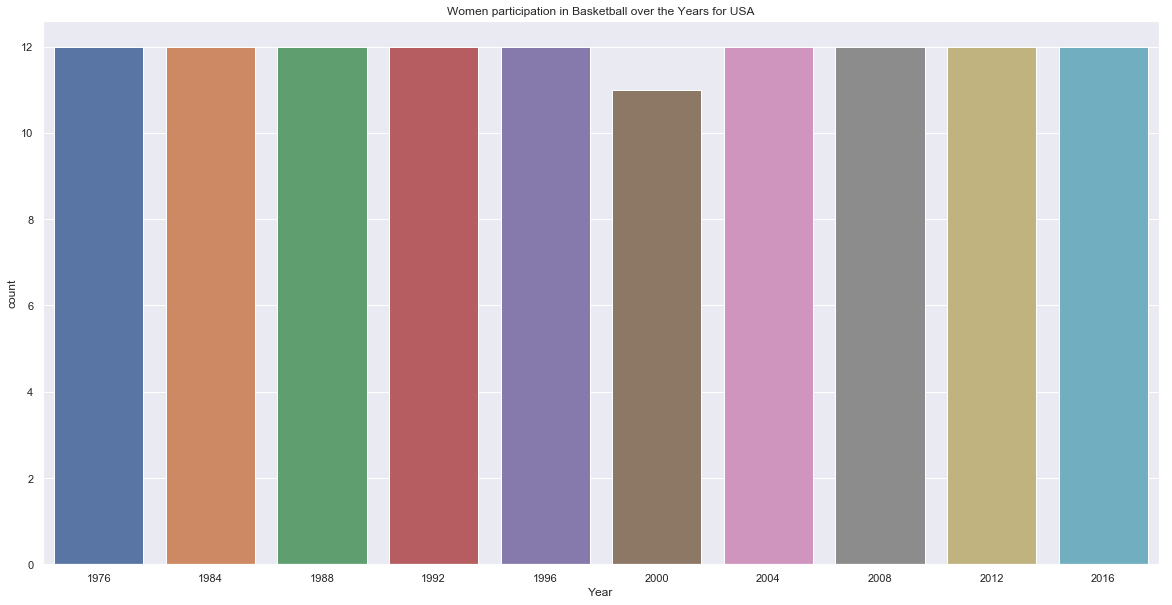

In [69]:
bb_females = summerUSA[(summerUSA.Sport == 'Basketball')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=bb_females)
plt.title('Women participation in Basketball over the Years for USA')

Text(0.5, 1.0, 'Women participation in Cycling over the Years for USA')

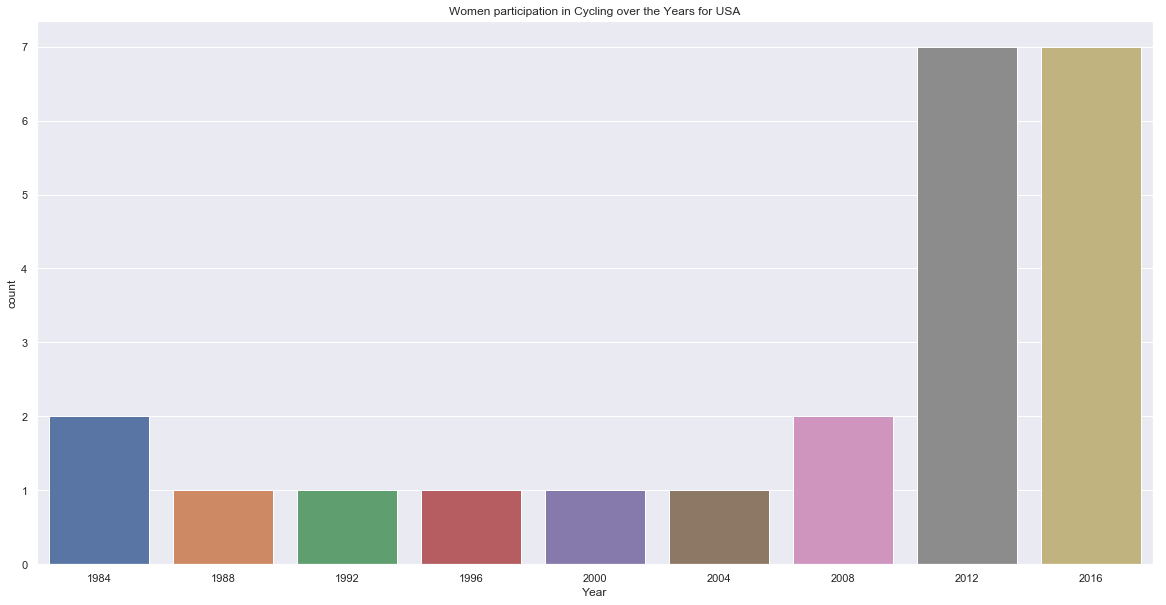

In [70]:
cy_females = summerUSA[(summerUSA.Sport == 'Cycling')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=cy_females)
plt.title('Women participation in Cycling over the Years for USA')

In [71]:
WinterUSA.Sport.value_counts().reset_index(name='Medal').head(20) # WinterUSA has females who won medals in the Olypics 
# from USA and now we have medals for them in all sports

,index,Medal
0,Ice Hockey,101
1,Figure Skating,36
2,Speed Skating,27
3,Alpine Skiing,26
4,Short Track Speed Skating,17
5,Snowboarding,11
6,Bobsleigh,10
7,Freestyle Skiing,9
8,Skeleton,3
9,Luge,1


Text(0.5, 1.0, 'Women participation in Ice Hockey over the Years for USA')

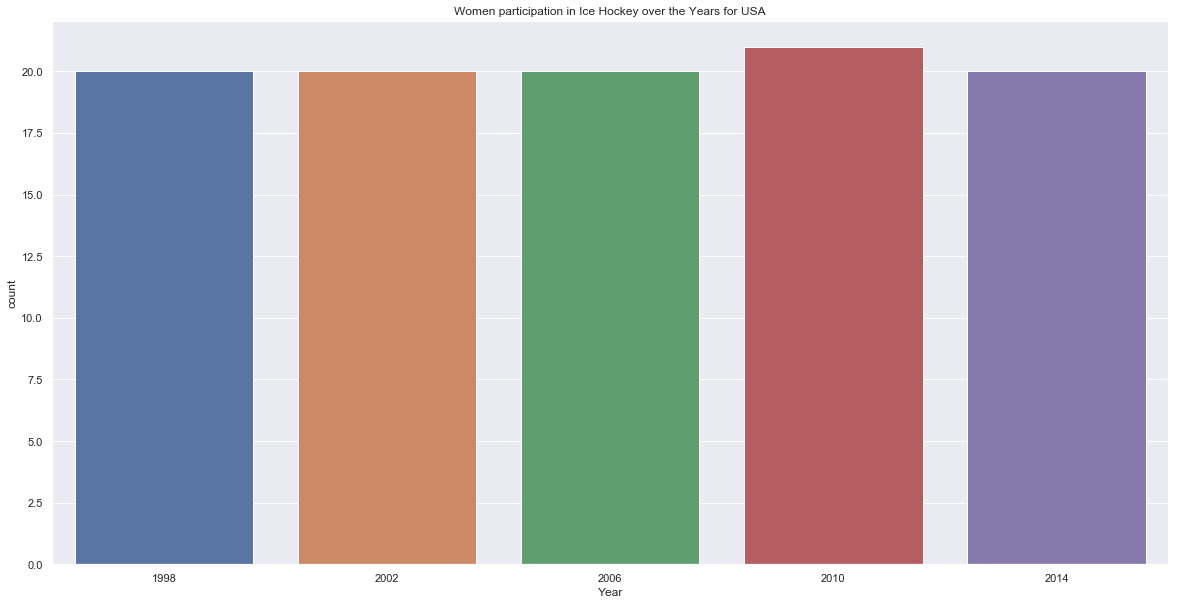

In [72]:
bb_females = WinterUSA[(WinterUSA.Sport == 'Ice Hockey')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=bb_females)
plt.title('Women participation in Ice Hockey over the Years for USA')

Text(0.5, 1.0, 'Women participation in Speed Skating over the Years for USA')

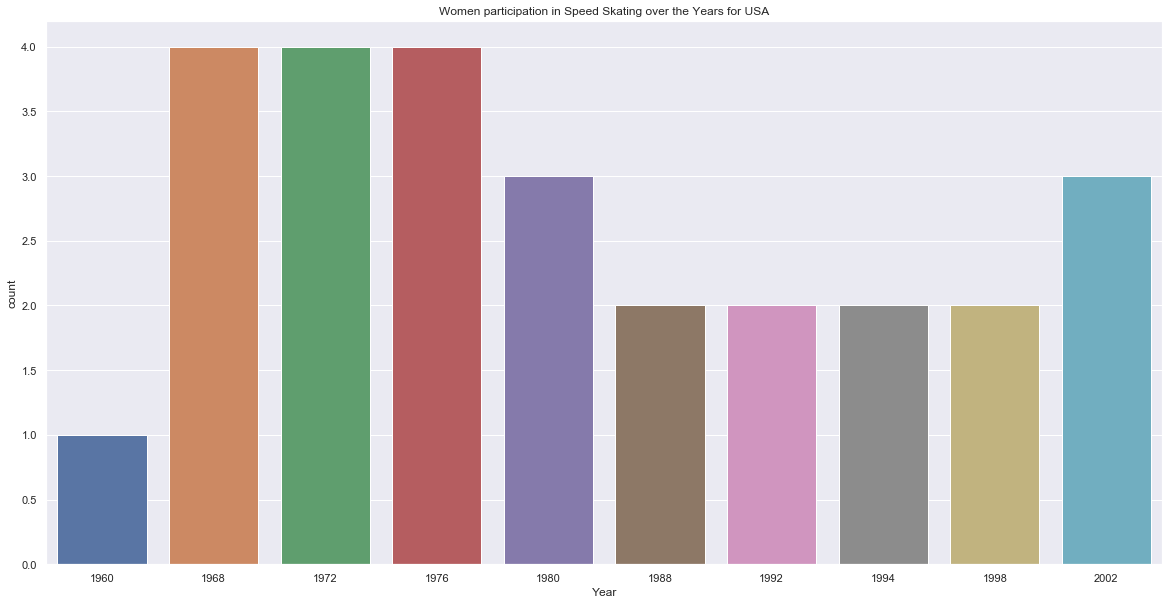

In [73]:
bb_females = WinterUSA[(WinterUSA.Sport == 'Speed Skating')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=bb_females)
plt.title('Women participation in Speed Skating over the Years for USA')